In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
plt.style.use('ggplot')
from matplotlib import style
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
from matplotlib import pyplot

# Think about your career/future career from a fincancial perspective.

When thinking about what we are studying or what we want to study, we tend to highly associate how much money would we make from what we are studying. In some cases, based on that, some people choose what want to study. This analysis focuses on showing how much would one expect in retrurn for what they are studing. It considers six different stages of a career, and five different regions in the USA.

In [65]:
degree = pd.read_csv('//home/students/aljamo01/degrees-that-pay-back.csv')
college = pd.read_csv('//home/students/aljamo01/salaries-by-college-type.csv')
region = pd.read_csv('//home/students/aljamo01/salaries-by-region.csv')

In [66]:
degree.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [67]:
college.sort_values('Mid-Career Median Salary', ascending=False).head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
99,"University of California, Davis",State,"$52,300.00","$99,600.00","$52,000.00","$71,600.00","$135,000.00","$202,000.00"
52,"Wesleyan University (Middletown, Connecticut)",Liberal Arts,"$46,500.00","$97,900.00","$42,000.00","$62,500.00","$126,000.00","$215,000.00"
11,Illinois Institute of Technology (IIT),Engineering,"$56,000.00","$97,800.00","$56,100.00","$77,400.00","$121,000.00","$165,000.00"
100,University of Colorado - Boulder (UCB),State,"$47,100.00","$97,600.00","$51,600.00","$69,000.00","$128,000.00","$187,000.00"
101,"University of California, Irvine (UCI)",State,"$48,300.00","$96,700.00","$47,800.00","$66,000.00","$123,000.00","$172,000.00"


In [68]:
region.sort_values('Mid-Career Median Salary', ascending=False).head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
246,Fordham University,Northeastern,"$47,800.00","$99,900.00","$48,600.00","$65,900.00","$142,000.00","$198,000.00"
9,University of Southern California (USC),California,"$54,800.00","$99,600.00","$49,700.00","$73,800.00","$140,000.00","$201,000.00"
10,"University of California, Davis",California,"$52,300.00","$99,600.00","$52,000.00","$71,600.00","$135,000.00","$202,000.00"
149,George Washington University (GWU),Southern,"$47,000.00","$97,900.00","$48,400.00","$69,600.00","$132,000.00","$194,000.00"
247,"Wesleyan University (Middletown, Connecticut)",Northeastern,"$46,500.00","$97,900.00","$42,000.00","$62,500.00","$126,000.00","$215,000.00"


In [69]:
RVC = college.merge(region).sort_values(by='Mid-Career Median Salary').reset_index(drop=True)
RVC1= RVC[['School Name', 'School Type', 'Region']]
RVC1.head()

,School Name,School Type,Region
0,Pomona College,Liberal Arts,California
1,Cal Poly San Luis Obispo,State,California
2,University of California at Los Angeles (UCLA),State,California
3,"University of California, San Diego (UCSD)",State,California
4,Williams College,Liberal Arts,Northeastern


# Cleaning the tables

In [70]:
def change_to_num(money):
    if type(money)== str and money[0] == '$':
        a = money[1:].replace(',','')
        return float(a)
    else:
        return money

In [71]:
degree = degree.applymap(change_to_num)
college = college.applymap(change_to_num)
region = region.applymap(change_to_num)

In [72]:
degree.columns = ['major','starting','midcareer','percent change', 'mid_10', 'mid_25', 'mid_75', 'mid_90']
college.columns = ['name','schooltype','starting','midcareer', 'mid_10', 'mid_25', 'mid_75', 'mid_90']
region.columns = ['name','region','starting','midcareer', 'mid_10', 'mid_25', 'mid_75', 'mid_90']

In [73]:
degree.head()

,major,starting,midcareer,percent change,mid_10,mid_25,mid_75,mid_90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


# Analysis of Salary by Major

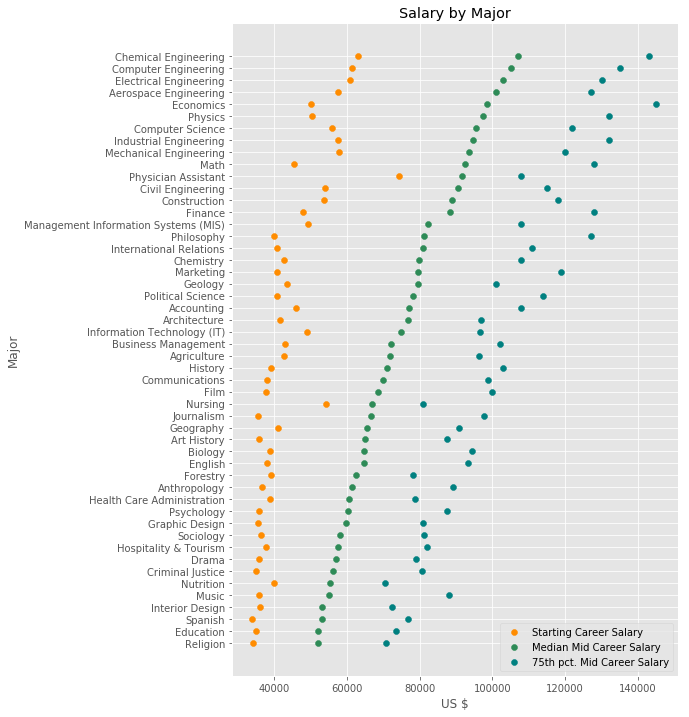

In [88]:
df = degree.sort_values(by = 'midcareer', ascending = False)
df = df.reset_index()

fig = plt.figure(figsize=(8,12))

x = df['starting']
y = len(df.index) - df.index
labels = df['major']

plt.yticks(y, labels)

x2 = df['starting']
plt.scatter(x2, y, color='darkorange', label = 'Starting Career Salary')
x3 = df['midcareer']
plt.scatter(x3, y, color='seagreen', label = 'Median Mid Career Salary')
x4 = df['mid_75']
plt.scatter(x4, y, color='teal', label = '75th pct. Mid Career Salary')
plt.xlabel('US $')
plt.ylabel('Major')
plt.title('Salary by Major')
plt.legend(loc=4)
plt.show()

First, from the graph 'Salary By Major' graph, looking at the starting salaries, We can point out that Physician's Assistant has a very high starting salary, and Engineering degrees come after. In the lower half of the graph, come majors such as History, Political Science, Business Management, and Nursing; noticing that nursing has an intersting starting salalry. At the bottom, we have the art majors such: Drama, Music, Art, Education, Religion, and Spanish. Looking at the medians, it appears that most people will make between 50K and 100K annual salary by the middle of their career. The majors that make the very most money, are Economics and Chemical Engineering majors. Another good performers, are Finance and unexpectedly Philosophy, where many people think a philosophy degree would not make much money in the long run.

# A close look at the top 10

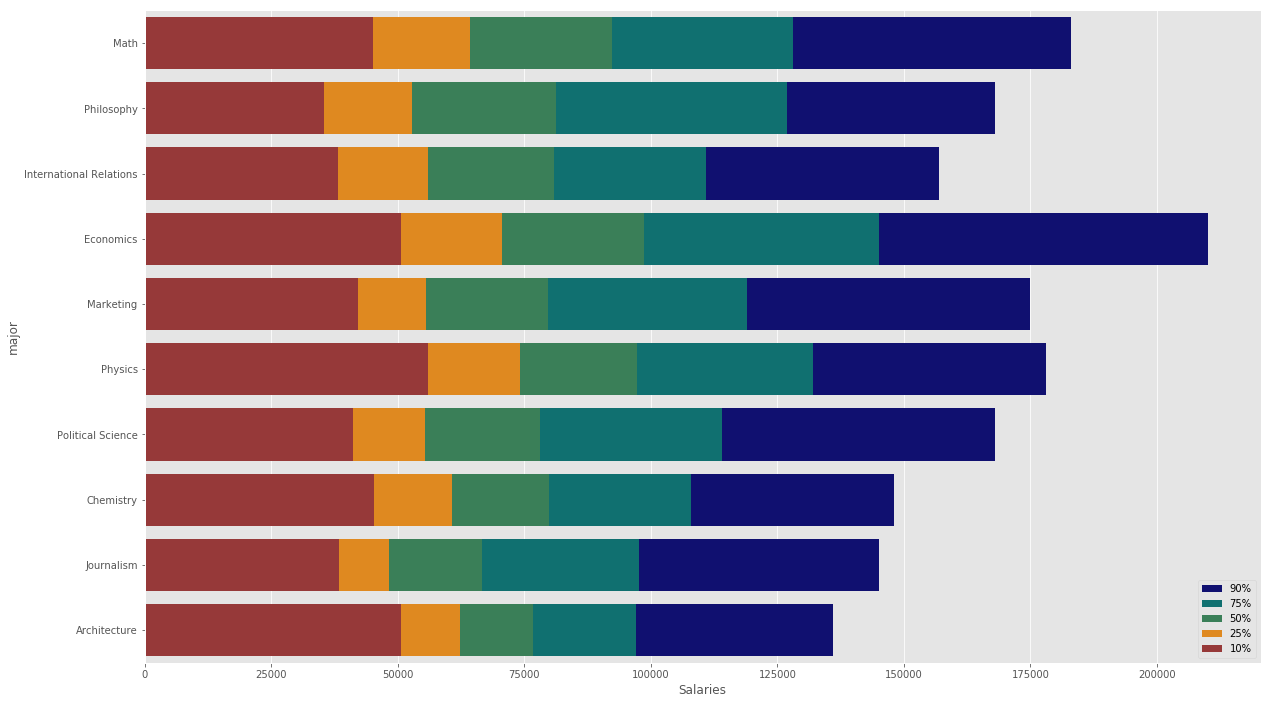

In [89]:
plt.figure(figsize=(20,12))
best_10 = degree.sort_values('percent change', ascending=False).head(10)
pl_90 = sns.barplot(x = "mid_90", y = "major", data=best_10, color = "navy", label = '90%')
pl_75 = sns.barplot(x = "mid_75", y = "major", data=best_10, color = "teal", label = '75%')
pl_50 = sns.barplot(x = "midcareer", y = "major", data=best_10, color = "seagreen", label = '50%')
pl_25 = sns.barplot(x = "mid_25", y = "major", data=best_10, color = "darkorange", label = '25%')
pl_10 = sns.barplot(x = "mid_10", y = "major", data=best_10, color = "brown", label = '10%')
pl_10.set_xlabel("Salaries")
pl_10.legend(loc=4) 
plt.show()

This graph Shows the top 10 performing majors, based on the percent change from starting salary to mid-career salary. It helps understand that it is not neccessary for one to have a major with a good starting salary in order to be able to make the most out of their career. the best examples are Philosophy and Political Science.

# Where/What to Start?

In [76]:
cols = ['name','region']
college_comb = pd.merge(left=college, right=region[cols], how='inner',on='name')
college_comb.head()

,name,schooltype,starting,midcareer,mid_10,mid_25,mid_75,mid_90,region
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,Northeastern
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN,California
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN,California
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,Northeastern
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN,Northeastern


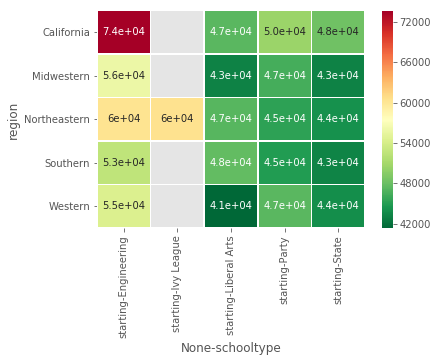

In [77]:
sns.heatmap(pivottable, cmap='RdYlGn_r', linewidths=0.5, annot=True)

This heat map investigates the performance of each school type in each region based on their starting salary. This would be a great guide for a student who want to see where to go for college. It indicates that Engineering schools look like a good investment across all regions, specifically in California. When comparing between a liberal arts, party, or state school, the difference is not great. We notice that Ivy league look like an outlier in this heat map, also Engineering has a fair amount higher value than the other school types. So, to be able to visualize the differences between Liberal arts, Party, or State school better we must eliminate both.

In [78]:
exc_eng = college_comb[college_comb.schooltype != 'Engineering']
exc_eng1 = exc_eng[exc_eng.schooltype != 'Ivy League']
pivottable2 = pd.pivot_table(exc_eng1,index=['region'],columns=['schooltype'], values =['starting'])

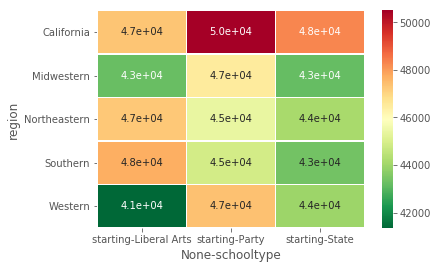

In [79]:
sns.heatmap(pivottable2, cmap='RdYlGn_r', linewidths=0.5, annot=True)

Now, it is easy to notice from the heat map that, Party schools slightly beat out state schools in every region. And Liberal arts schools look the least attractive in the Midwest and Western regions.

# In the long run, what school type makes the most salary?

In [80]:
grouped_df = college.groupby("schooltype").mean().sort_values(by="starting",ascending=False)
grouped_df=grouped_df.transpose()
grouped_df.head()

schooltype,Ivy League,Engineering,Liberal Arts,Party,State
starting,60475.0,59057.894737,45746.808511,45715.000000,44126.285714
midcareer,120125.0,103842.105263,89378.723404,84685.000000,78567.428571
mid_10,57900.0,61793.333333,47478.571429,44052.631579,41886.285714
mid_25,82787.5,81384.210526,61936.170213,60005.000000,56689.714286
mid_75,184125.0,134868.421053,131076.595745,118100.000000,106970.857143


Text(0.5,0,'Career')

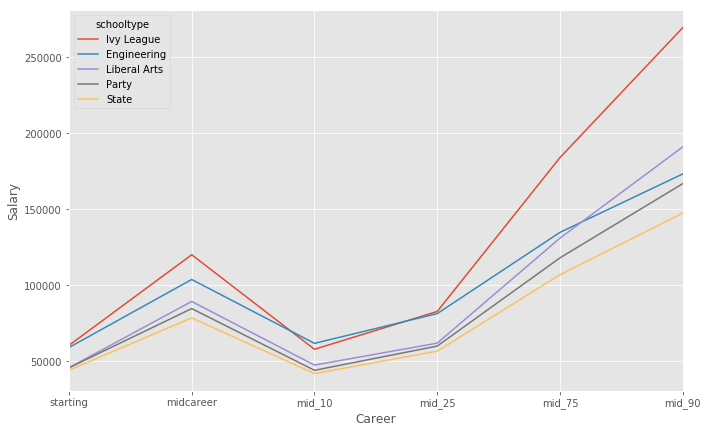

In [81]:
f,ax = plt.subplots(figsize=(11,7))
grouped_df.plot(ax=ax)
ax.set_ylabel("Salary")
ax.set_xlabel("Career")

Here we can see that Ivy League and Engineering almost start with the same starting salary, and rest of the three college types start with almost same starting salaries. However, we notice that the Ivy Leagu grows rapidly and exponentially, and takes the lead from engineering at about mid_25th percentile. A very interesting point we find from this map, that Engineering starts falling behind Liberal Arts at mid_75.